<a href="https://colab.research.google.com/github/giuliaries/MachineLearning/blob/main/Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Giulia Santoiemma](mailto:giulia.santoiemma@studenti.unipd.it) 2004775<br/>
Machine Learning<br/> 
Master Degree in Computer Science<br/>
10 December 2021

In [10]:
# Import libraries
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

,ones,x,y,t
0,1.0,4.751114,7.238699,1.0
1,1.0,7.010437,-4.725234,1.0
2,1.0,-1.664917,8.304715,0.0
3,1.0,16.461247,13.952955,1.0
4,1.0,-20.253029,-4.153487,0.0
...,...,...,...,...
95,1.0,-19.117289,6.990317,0.0
96,1.0,10.251558,-5.465216,0.0
97,1.0,-6.261211,-15.287271,0.0
98,1.0,10.199092,2.354841,1.0


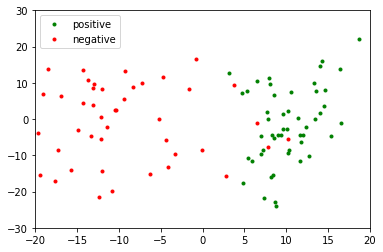

In [31]:
# Generate a linearly dataset by using sklearn.datasets.make_classification
samples = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
X = samples[0]
y = samples[1]

# Training Set as pd.DataFrame
ts = pd.DataFrame(columns = ["ones", "x", "y", "t"])
for k, i in enumerate(X):
  ts = ts.append({
    "ones": 1.0, 
    "x": i[0] * 10,
    "y": i[1] * 10,
    "t": y[k] # 1 if y[k] == 1 else -1
  }, ignore_index = True)

plt.plot(ts["x"][ts["t"] == 1], ts["y"][ts["t"] == 1], ".g", label = "positive")
plt.plot(ts["x"][ts["t"] == 0], ts["y"][ts["t"] == 0], ".r", label = "negative")
plt.xlim(-20, 20)
plt.ylim(-30, 30)
plt.legend()

ts

In [32]:
# Split the datasets into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)

# Fit the current model according to the given training dataset
#bdt_model = bdt.fit(X, y)
bdt_model = bdt.fit(X_train, y_train)

# Predict the classification for the provided data (the test set)
y_pred = bdt_model.predict(X_test)

headers = ["", "AdaBoosted Decision Tree"]
report = [["𝜶 Accuracy"], ["𝝅 Precision"], ["𝝆 Recall"]]
report[0].append(accuracy_score(y_test, y_pred))
report[1].append(precision_score(y_test, y_pred, average="macro"))
report[2].append(recall_score(y_test, y_pred, average="macro"))

# Show the results for the Neural Network Classifier
print(tabulate(report, headers=headers, tablefmt="rst"))

===========  ==========================
..             AdaBoosted Decision Tree
===========  ==========================
𝜶 Accuracy                     0.966667
𝝅 Precision                    0.966667
𝝆 Recall                       0.96875
===========  ==========================


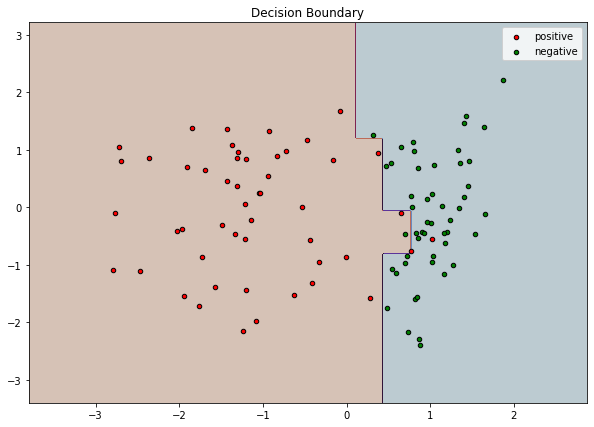

In [33]:
# Plot
plot_colors = "rg"
plot_step = 0.02
class_names = ["positive", "negative"]

plt.figure(figsize=(10, 7))

# Plot the decision boundaries
plt.subplot(111)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
)

# Background
Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap = plt.cm.twilight_r)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c = c,
        cmap = plt.cm.twilight_r,
        s = 20,
        edgecolor = "k",
        label = n
    )

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc = "upper right")
plt.title("Decision Boundary")

plt.show()